In [2]:
#importing libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler


In [3]:
#reading the data
forest_fires=pd.read_csv('forestfires.csv')
forest_fires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forest_fires.size_category.unique()

array(['small', 'large'], dtype=object)

In [8]:
#converting categorical data to numeric

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
forest_fires.size_category=le.fit_transform(forest_fires.size_category)
forest_fires.month=le.fit_transform(forest_fires.month)
forest_fires.day=le.fit_transform(forest_fires.day)

forest_fires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [9]:
array = forest_fires.values
X = array[:,0:11]
y = array[:,-1]

In [10]:
X

array([[ 7.  ,  0.  , 86.2 , ...,  6.7 ,  0.  ,  0.  ],
       [10.  ,  5.  , 90.6 , ...,  0.9 ,  0.  ,  0.  ],
       [10.  ,  2.  , 90.6 , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 1.  ,  3.  , 81.6 , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  2.  , 94.4 , ...,  4.  ,  0.  ,  0.  ],
       [ 9.  ,  5.  , 79.5 , ...,  4.5 ,  0.  ,  0.  ]])

In [11]:
a=StandardScaler()
a.fit(X)
X_standardised=a.transform(X)

In [12]:
pd.DataFrame(X_standardised).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-4.874674e-17,5.110891e-17,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959e+00,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-1.089076e+00,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,5.533922e-02,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.199754e+00,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.199754e+00,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


In [13]:
#importing libraries

import tensorflow as tf
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [14]:
#creating user define model for hyper tuning

def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=11,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])
    return model

In [15]:
#create the model

model=KerasClassifier(build_fn=create_model,verbose=0)

#define the grid search parameters
batch_size=[10,20,40]
epochs=[50,100,150]

#make a dictionaty of the grid search parameters
param_grid=dict(batch_size=batch_size,epochs=epochs)

#build and fit gridsearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=0)
grid_result=grid.fit(X_standardised,y)

C:\Users\RAJANI\AppData\Local\Temp/ipykernel_5584/2436029171.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model,verbose=0)


In [16]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print(' {},{} with: {} '.format(mean,stdev,param))
    
#Best : 0.9709111332893372, using {'batch_size': 10, 'epochs': 100}


Best : 0.9709111332893372, using {'batch_size': 10, 'epochs': 100}
 0.9553958296775817,0.030483877571797265 with: {'batch_size': 10, 'epochs': 50} 
 0.9709111332893372,0.02679226598625757 with: {'batch_size': 10, 'epochs': 100} 
 0.9670276403427124,0.022682917449287562 with: {'batch_size': 10, 'epochs': 150} 
 0.963181471824646,0.02247139442935497 with: {'batch_size': 20, 'epochs': 50} 
 0.9554331541061402,0.022692927705248035 with: {'batch_size': 20, 'epochs': 100} 
 0.9651045680046082,0.021811311103017185 with: {'batch_size': 20, 'epochs': 150} 
 0.9476848363876342,0.028515745495204997 with: {'batch_size': 40, 'epochs': 50} 
 0.9592793226242066,0.02842849768368734 with: {'batch_size': 40, 'epochs': 100} 
 0.9535100936889649,0.028360213244869967 with: {'batch_size': 40, 'epochs': 150} 


In [17]:
#hyper tuning of learning rate and dropout rate

from tensorflow.keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
    model=Sequential()
    model.add(Dense(8,input_dim=11,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim=11,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])
    return model


In [18]:
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=10,epochs=100)

#define the grid search parameters
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]

#make a dictionaty of the grid search parameters
param_grid=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

#build and fit gridsearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X_standardised,y)


C:\Users\RAJANI\AppData\Local\Temp/ipykernel_5584/2171723541.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=10,epochs=100)
C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   7.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   7.2s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   9.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.961 total time=   7.3s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.932 total time=   7.4s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   7.9s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.971 total time=   8.7s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.524 total time=   9.3s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.971 total time=   7.5s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.922 total time=   8.4s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   7.8s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=1.000 total time=   7.1s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.971 total time=   7.4s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.971 total time=   7.1s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.922 total time=   7.1s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   7.4s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   7.5s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=1.000 total time=   7.5s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.961 total time=   8.4s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.932 total time=   7.4s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   7.7s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.990 total time=   7.6s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=1.000 total time=   7.4s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.961 total time=   7.5s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.922 total time=   7.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=1.000 total time=   7.5s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.952 total time=   7.8s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.524 total time=   7.4s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.680 total time=   7.5s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.961 total time=   7.6s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   7.6s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.981 total time=   7.5s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=1.000 total time=   7.4s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.961 total time=   8.6s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.932 total time=   9.0s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=1.000 total time=   8.7s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.990 total time=  11.1s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.932 total time=   8.8s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.942 total time=   7.9s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.942 total time=   8.7s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=  11.0s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.750 total time=   7.9s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.524 total time=   7.8s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.709 total time=   8.1s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.903 total time=   7.8s


In [19]:
 print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print(' {},{} with: {} '.format(mean,stdev,param))
    
#Best : 0.9786407828330994, using {'dropout_rate': 0.1, 'learning_rate': 0.01}

Best : 0.9786407828330994, using {'dropout_rate': 0.1, 'learning_rate': 0.001}
 0.9747759580612183,0.025029280078353495 with: {'dropout_rate': 0.0, 'learning_rate': 0.001} 
 0.8777259111404419,0.17848000787283946 with: {'dropout_rate': 0.0, 'learning_rate': 0.01} 
 0.9728155255317688,0.02840532405057507 with: {'dropout_rate': 0.0, 'learning_rate': 0.1} 
 0.9786407828330994,0.027733696946656065 with: {'dropout_rate': 0.1, 'learning_rate': 0.001} 
 0.9747759580612183,0.02983944273610623 with: {'dropout_rate': 0.1, 'learning_rate': 0.01} 
 0.8233943223953247,0.1880625983674113 with: {'dropout_rate': 0.1, 'learning_rate': 0.1} 
 0.9747946262359619,0.025768737659719442 with: {'dropout_rate': 0.2, 'learning_rate': 0.001} 
 0.9611837148666382,0.028157950017555857 with: {'dropout_rate': 0.2, 'learning_rate': 0.01} 
 0.7771844625473022,0.16422122757598895 with: {'dropout_rate': 0.2, 'learning_rate': 0.1} 


# hyper tuning of neurons

In [21]:
def create_model(neuron1,neuron2):
    model=Sequential()
    model.add(Dense(neuron1,input_dim=11,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])
    return model

In [22]:
#create the model

model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=10,epochs=100)

#define the grid search parameters

neuron1=[4,8,16]
neuron2=[2,4,8]

#make a dictionaty of the grid search parameters

param_grid=dict(neuron1=neuron1,neuron2=neuron2)

#build and fit gridsearchCV

grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X_standardised,y)


C:\Users\RAJANI\AppData\Local\Temp/ipykernel_5584/3049809211.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=10,epochs=100)
C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   8.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.981 total time=   7.5s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   8.4s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   7.6s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   9.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   7.9s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.990 total time=   7.8s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.990 total time=   7.5s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.971 total time=   7.4s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.951 total time=   7.4s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=1.000 total time=   7.5s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.990 total time=   7.5s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.990 total time=   7.6s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.951 total time=   7.5s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.951 total time=   7.5s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=1.000 total time=   8.0s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.971 total time=   7.3s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.524 total time=   7.6s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.961 total time=   7.5s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.942 total time=   7.5s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   7.4s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=   7.5s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.524 total time=   7.4s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.961 total time=   7.5s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.942 total time=   7.5s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   7.4s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=1.000 total time=   7.5s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.951 total time=   7.4s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.961 total time=   7.5s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.932 total time=   7.4s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=1.000 total time=   7.4s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.990 total time=   7.8s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.971 total time=   8.6s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.951 total time=   9.5s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.942 total time=   8.0s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=1.000 total time=   7.4s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.962 total time=   7.5s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.981 total time=   7.4s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.951 total time=   7.6s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.922 total time=   7.5s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=1.000 total time=   7.9s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.971 total time=   7.6s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.971 total time=   7.5s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.981 total time=   7.5s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.932 total time=   7.4s


In [23]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print(' {},{} with: {} '.format(mean,stdev,param))
#Best : 0.9806198716163635, using {'neuron1': 4, 'neuron2': 2}

Best : 0.9806198716163635, using {'neuron1': 4, 'neuron2': 2}
 0.9806198716163635,0.017367668966837682 with: {'neuron1': 4, 'neuron2': 2} 
 0.9806011915206909,0.017377994604216903 with: {'neuron1': 4, 'neuron2': 4} 
 0.9767176985740662,0.020925426829504986 with: {'neuron1': 4, 'neuron2': 8} 
 0.8796676635742188,0.1786905262832403 with: {'neuron1': 8, 'neuron2': 2} 
 0.8854368925094604,0.18198639993868695 with: {'neuron1': 8, 'neuron2': 4} 
 0.968932044506073,0.0270454107983685 with: {'neuron1': 8, 'neuron2': 8} 
 0.9708924531936646,0.022155740747388953 with: {'neuron1': 16, 'neuron2': 2} 
 0.963181471824646,0.026334069764351015 with: {'neuron1': 16, 'neuron2': 4} 
 0.9709298014640808,0.022139609993004912 with: {'neuron1': 16, 'neuron2': 8} 


# Training the model with optimum parameters

In [26]:
from sklearn.metrics import classification_report,accuracy_score
def create_model():
    model=Sequential()
    model.add(Dense(4,input_dim=11,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2,input_dim=4,kernel_initializer='normal',activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['acc'])
    return model
    

In [27]:
#create the model
model=KerasClassifier(build_fn=create_model,validation_split=0.33,verbose=0,batch_size=10,epochs=100)

#fitting the model
history2=model.fit(X_standardised,y)

#predicting the model 
y_predict=model.predict(X_standardised)

#accuracy of the model
print(accuracy_score(y,y_predict))

#so the accuracy by tuning all the parameters is 0.9825918762088974


C:\Users\RAJANI\AppData\Local\Temp/ipykernel_5584/3030568469.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model,validation_split=0.33,verbose=0,batch_size=10,epochs=100)
C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


0.9825918762088974


In [28]:
# Visualize training history

# list all data in history
history2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

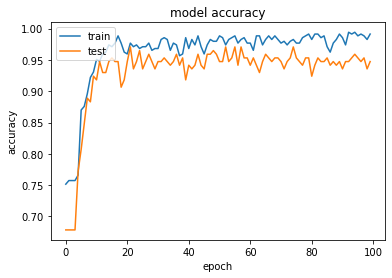

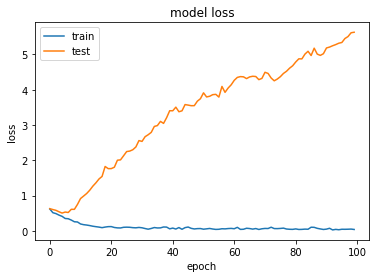

In [30]:
# summarize history for accuracy

import matplotlib.pyplot as plt
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Accuracy of both the train and test are same for all the epochs
### Loss is same till almost at epoch 10 or 15 and from there test loss is increasing